In modern data analytics, deciding whether two numerical samples come from the same
underlying distribution is called A/B testing. The name refers to the labels of the two
samples, A and B. This dataset and its comparision follows A/B testing

In [2]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np

In [3]:
import pandas as pd
baby = pd.read_csv('test.csv')
baby

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [4]:
smoking_and_age = baby[['Maternal Smoker', 'Maternal Age']]
smoking_and_age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [5]:
smoking_and_age['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [7]:
smoker = smoking_and_age['Maternal Age'] [smoking_and_age['Maternal Smoker'] == True]
smoker

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [9]:
non_smoker = smoking_and_age['Maternal Age'] [smoking_and_age['Maternal Smoker'] == False]
non_smoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

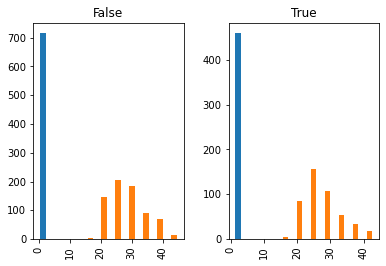

In [11]:
smoking_and_age.hist(by ='Maternal Smoker')

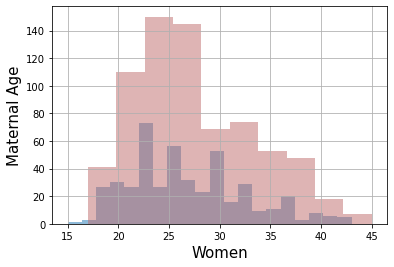

In [16]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Maternal Age',fontsize=15)
plt.show()

The distribution of the ages of mothers who smoked appears to be
shifted slightly to the left of the distribution corresponding to non-smoking mothers. The
ages of the mothers who smoked seem lower, on average than the ages
of the non-smokers. 

### Test Statistic
The alternative hypothesis compares the average ages of the two groups and says
that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to
use the difference between the two group means as our statistic.

We will do the subtraction in the order "average age of the smoking group - average
age of the non-smoking group". Small values of this
statistic will favor the alternative hypothesis

The observed value of the test statistic is about -0.807.
means_table = smoking_and_age.group('Maternal Smoker',np.average)
means_table

### The Hypotheses
The chance model that we will
test says that there is no underlying difference; the distributions in the samples are different
just due to chance. Formally, this is the null hypothesis.
Null hypothesis: In the population, the distribution of ages is same for
mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.
Alternative hypothesis: In the population, the ages of the mothers who smoke have a
lower birth weight, on average, than the ages of the non-smokers. """

In [18]:
means_table = smoking_and_age.groupby('Maternal Smoker').mean()
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [19]:
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference

-0.8076725017901509

### Predicting the Statistic Under the Null Hypothesis
To see how the statistic should vary under the null hypothesis, we have to figure out how to
simulate the statistic under that hypothesis. A clever method based on random permutations
does just that.
#### Random permutation
If there were no difference between the two distributions in the underlying population, 
then whether a age has the label True or False with respect to maternal smoking should make no difference to the average.
The idea, then, is to shuffle all the ages randomly among the mothers. This is called random permutation.

Take the difference of the two new group means: the mean of the shuffled weights assigned to the smokers and the mean of the shuffled weights assigned to the non-smokers. This is a simulated value of the test statistic under the null hypothesis.

In [21]:
smoking_and_age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


There are 1,174 rows in the table. To shuffle all the ages, we will draw a random
sample of 1,174 rows without replacement. Then the sample will include all the rows of the
table, in random order.
We can use the method sample with the optional replace=False argument.

In [22]:
shuffled = smoking_and_age.sample(1174,replace = False)
shuffled

,Maternal Smoker,Maternal Age
1034,False,33
1071,False,41
753,True,34
583,True,26
833,False,27
...,...,...
830,True,23
618,True,30
250,False,35
678,False,33


In [23]:
shuffled_age = shuffled['Maternal Age']
shuffled_age

1034    33
1071    41
753     34
583     26
833     27
        ..
830     23
618     30
250     35
678     33
767     30
Name: Maternal Age, Length: 1174, dtype: int64

In [24]:
original_and_shuffled= smoking_and_age.assign(shuffled_age=shuffled_age.values )

In [25]:
original_and_shuffled

,Maternal Smoker,Maternal Age,shuffled_age
0,False,27,33
1,False,33,41
2,True,28,34
3,True,23,26
4,False,25,27
...,...,...,...
1169,False,27,23
1170,False,24,30
1171,True,30,35
1172,False,21,33


Each mother now has a random age assigned to her. If the null hypothesis is true, all these random arrangements should be equally likely. See how different the average ages are in the two randomly selected groups.

In [26]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Maternal Age,shuffled_age
Maternal Smoker,,
False,27.544056,27.516084
True,26.736383,26.779956


In [27]:
difference = all_group_means['shuffled_age'][0]- all_group_means['shuffled_age'][1]
difference

0.7361274890686644

#### But could a different shuffle have resulted in a samller difference between the group average

To get a sense of the variability, simulate the difference many times.

In [28]:
smoking_and_age = baby[['Maternal Smoker', 'Maternal Age']]
shuffled = smoking_and_age.sample(1174,replace = False)
shuffled_age = shuffled['Maternal Age']
original_and_shuffled = smoking_and_age.assign(shuffled_age=shuffled_age.values )
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
difference = all_group_means['shuffled_age'][0]- all_group_means['shuffled_age'][1]
difference

0.16734463793287446

#### Permutation Test
Tests based on random permutations of the data are called permutation tests. Simulate the test statistic – the
difference between the averages of the two groups – many times and collect the differences in an array. 

In [29]:
import numpy as np
import array
differences = np.zeros(5000)
for i in np.arange(5000):
    smoking_and_age = baby[['Maternal Smoker', 'Maternal Age']]
    shuffled = smoking_and_age.sample(1174,replace = False)
    shuffled_age = shuffled['Maternal Age']
    original_and_shuffled = smoking_and_age.assign(shuffled_age=shuffled_age.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_age'][0]- all_group_means['shuffled_age'][1]
    differences[i] = difference

In [30]:
differences


array([-0.13314442, -0.21184393,  0.16376739, ..., -0.3155842 ,
        0.28181666,  0.02783186])

In [31]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,-0.133144
1,-0.211844
2,0.163767
3,0.070759
4,-0.394284
...,...
4995,0.195963
4996,0.110109
4997,-0.315584
4998,0.281817


Observed Difference: -0.8076725017901509


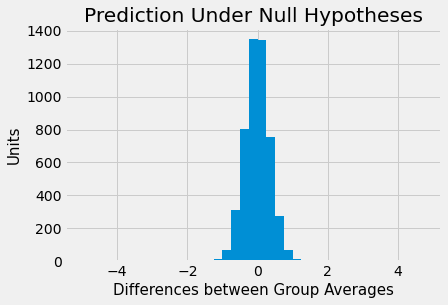

In [36]:
differences_df.hist(bins = np.arange(-5,5,0.25))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.scatter(observed_difference, 0, color='red', s=30)
print('Observed Difference:', observed_difference)

Notice how the distribution is centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about -0.807, which is even appear on the horizontal scale of the histogram. The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are consistent.

#### The conclusion of the test is that the data support the null more than they support the alternate. The average age of mothers who smoke nearly equals that who doesn't.


In [35]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.0096

p - value is 0.0096

The empirical P-value is 0.0096, meaning that 48 of the 5,000 observed samples resulted in a difference of -0.807 or lower. 
### Therefore, Here its fail to reject null hypothesis.